## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   7.795414  1067.372040  0.588551  6.667429  1.582096
1  19.728317   372.359144  0.790789  9.693420  1.371875
2  42.289433  1665.467168  0.502536  7.304885  1.606488
3  23.246806  1156.750528  0.592125  7.203406  1.641333
4  83.640286   262.549339  0.619631  2.321826  1.120951


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9754139	total: 66.1ms	remaining: 1m 5s


1:	learn: 0.9674288	total: 68.7ms	remaining: 34.3s
2:	learn: 0.9586514	total: 70.1ms	remaining: 23.3s
3:	learn: 0.9480671	total: 71.6ms	remaining: 17.8s
4:	learn: 0.9380760	total: 72.3ms	remaining: 14.4s
5:	learn: 0.9298576	total: 73.3ms	remaining: 12.1s
6:	learn: 0.9190475	total: 74.3ms	remaining: 10.5s
7:	learn: 0.9089448	total: 74.8ms	remaining: 9.28s
8:	learn: 0.8997886	total: 76.1ms	remaining: 8.38s
9:	learn: 0.8896027	total: 77.2ms	remaining: 7.64s
10:	learn: 0.8803326	total: 77.9ms	remaining: 7s
11:	learn: 0.8716102	total: 78.5ms	remaining: 6.46s
12:	learn: 0.8616600	total: 79.1ms	remaining: 6s
13:	learn: 0.8524894	total: 79.7ms	remaining: 5.62s
14:	learn: 0.8437375	total: 80.3ms	remaining: 5.27s
15:	learn: 0.8355484	total: 81ms	remaining: 4.98s
16:	learn: 0.8273974	total: 81.6ms	remaining: 4.72s
17:	learn: 0.8178482	total: 82.2ms	remaining: 4.48s
18:	learn: 0.8093050	total: 82.7ms	remaining: 4.27s
19:	learn: 0.8005992	total: 83.1ms	remaining: 4.07s
20:	learn: 0.7916610	total: 8

185:	learn: 0.2335438	total: 165ms	remaining: 723ms
186:	learn: 0.2321424	total: 166ms	remaining: 720ms
187:	learn: 0.2309668	total: 166ms	remaining: 718ms
188:	learn: 0.2298185	total: 167ms	remaining: 715ms
189:	learn: 0.2285248	total: 167ms	remaining: 713ms
190:	learn: 0.2273164	total: 168ms	remaining: 710ms
191:	learn: 0.2257521	total: 168ms	remaining: 706ms
192:	learn: 0.2247079	total: 168ms	remaining: 704ms
193:	learn: 0.2234991	total: 169ms	remaining: 701ms
194:	learn: 0.2220435	total: 169ms	remaining: 698ms
195:	learn: 0.2209169	total: 170ms	remaining: 696ms
196:	learn: 0.2196232	total: 170ms	remaining: 693ms
197:	learn: 0.2185048	total: 170ms	remaining: 690ms
198:	learn: 0.2174538	total: 173ms	remaining: 697ms
199:	learn: 0.2163268	total: 174ms	remaining: 694ms
200:	learn: 0.2152804	total: 174ms	remaining: 692ms
201:	learn: 0.2139597	total: 175ms	remaining: 690ms
202:	learn: 0.2128118	total: 175ms	remaining: 687ms
203:	learn: 0.2118381	total: 175ms	remaining: 684ms
204:	learn: 

283:	learn: 0.1422403	total: 215ms	remaining: 542ms
284:	learn: 0.1416528	total: 216ms	remaining: 541ms
285:	learn: 0.1408936	total: 216ms	remaining: 539ms
286:	learn: 0.1402795	total: 216ms	remaining: 537ms
287:	learn: 0.1396117	total: 217ms	remaining: 536ms
288:	learn: 0.1389046	total: 217ms	remaining: 534ms
289:	learn: 0.1383474	total: 218ms	remaining: 533ms
290:	learn: 0.1377663	total: 218ms	remaining: 531ms
291:	learn: 0.1370307	total: 218ms	remaining: 529ms
292:	learn: 0.1366337	total: 219ms	remaining: 528ms
293:	learn: 0.1360955	total: 219ms	remaining: 526ms
294:	learn: 0.1355150	total: 220ms	remaining: 525ms
295:	learn: 0.1349693	total: 220ms	remaining: 523ms
296:	learn: 0.1345257	total: 220ms	remaining: 522ms
297:	learn: 0.1340572	total: 221ms	remaining: 520ms
298:	learn: 0.1335463	total: 221ms	remaining: 519ms
299:	learn: 0.1330630	total: 222ms	remaining: 517ms
300:	learn: 0.1325383	total: 222ms	remaining: 516ms
301:	learn: 0.1320488	total: 222ms	remaining: 514ms
302:	learn: 

416:	learn: 0.0881438	total: 285ms	remaining: 398ms
417:	learn: 0.0880103	total: 285ms	remaining: 397ms
418:	learn: 0.0878788	total: 286ms	remaining: 396ms
419:	learn: 0.0876747	total: 287ms	remaining: 396ms
420:	learn: 0.0873640	total: 287ms	remaining: 395ms
421:	learn: 0.0870519	total: 288ms	remaining: 394ms
422:	learn: 0.0869234	total: 288ms	remaining: 393ms
423:	learn: 0.0866188	total: 289ms	remaining: 392ms
424:	learn: 0.0864916	total: 289ms	remaining: 391ms
425:	learn: 0.0862930	total: 290ms	remaining: 390ms
426:	learn: 0.0859901	total: 290ms	remaining: 389ms
427:	learn: 0.0856938	total: 290ms	remaining: 388ms
428:	learn: 0.0855692	total: 291ms	remaining: 387ms
429:	learn: 0.0852700	total: 291ms	remaining: 386ms
430:	learn: 0.0851948	total: 292ms	remaining: 385ms
431:	learn: 0.0851206	total: 292ms	remaining: 384ms
432:	learn: 0.0848291	total: 293ms	remaining: 383ms
433:	learn: 0.0845541	total: 293ms	remaining: 383ms
434:	learn: 0.0844816	total: 294ms	remaining: 382ms
435:	learn: 

541:	learn: 0.0646626	total: 344ms	remaining: 291ms
542:	learn: 0.0645277	total: 345ms	remaining: 290ms
543:	learn: 0.0643131	total: 345ms	remaining: 289ms
544:	learn: 0.0642419	total: 346ms	remaining: 289ms
545:	learn: 0.0641378	total: 346ms	remaining: 288ms
546:	learn: 0.0639835	total: 347ms	remaining: 287ms
547:	learn: 0.0637892	total: 347ms	remaining: 286ms
548:	learn: 0.0636580	total: 348ms	remaining: 285ms
549:	learn: 0.0634817	total: 348ms	remaining: 285ms
550:	learn: 0.0633313	total: 349ms	remaining: 284ms
551:	learn: 0.0631521	total: 349ms	remaining: 283ms
552:	learn: 0.0630037	total: 350ms	remaining: 283ms
553:	learn: 0.0629360	total: 350ms	remaining: 282ms
554:	learn: 0.0627755	total: 351ms	remaining: 281ms
555:	learn: 0.0626297	total: 351ms	remaining: 280ms
556:	learn: 0.0624858	total: 351ms	remaining: 280ms
557:	learn: 0.0622394	total: 352ms	remaining: 279ms
558:	learn: 0.0620974	total: 352ms	remaining: 278ms
559:	learn: 0.0619985	total: 353ms	remaining: 277ms
560:	learn: 

771:	learn: 0.0401541	total: 448ms	remaining: 132ms
772:	learn: 0.0401235	total: 449ms	remaining: 132ms
773:	learn: 0.0400093	total: 449ms	remaining: 131ms
774:	learn: 0.0399843	total: 450ms	remaining: 131ms
775:	learn: 0.0398722	total: 450ms	remaining: 130ms
776:	learn: 0.0397650	total: 450ms	remaining: 129ms
777:	learn: 0.0397430	total: 451ms	remaining: 129ms
778:	learn: 0.0396427	total: 451ms	remaining: 128ms
779:	learn: 0.0396184	total: 452ms	remaining: 127ms
780:	learn: 0.0394823	total: 452ms	remaining: 127ms
781:	learn: 0.0394257	total: 453ms	remaining: 126ms
782:	learn: 0.0393710	total: 453ms	remaining: 126ms
783:	learn: 0.0392726	total: 453ms	remaining: 125ms
784:	learn: 0.0391525	total: 454ms	remaining: 124ms
785:	learn: 0.0390990	total: 454ms	remaining: 124ms
786:	learn: 0.0390026	total: 455ms	remaining: 123ms
787:	learn: 0.0389490	total: 455ms	remaining: 123ms
788:	learn: 0.0388540	total: 456ms	remaining: 122ms
789:	learn: 0.0388024	total: 457ms	remaining: 121ms
790:	learn: 

865:	learn: 0.0321684	total: 501ms	remaining: 77.5ms
866:	learn: 0.0320413	total: 502ms	remaining: 76.9ms
867:	learn: 0.0318948	total: 502ms	remaining: 76.4ms
868:	learn: 0.0317525	total: 503ms	remaining: 75.8ms
869:	learn: 0.0317373	total: 503ms	remaining: 75.2ms
870:	learn: 0.0317223	total: 504ms	remaining: 74.7ms
871:	learn: 0.0316592	total: 505ms	remaining: 74.1ms
872:	learn: 0.0315234	total: 506ms	remaining: 73.6ms
873:	learn: 0.0314694	total: 506ms	remaining: 73ms
874:	learn: 0.0313970	total: 507ms	remaining: 72.4ms
875:	learn: 0.0312745	total: 507ms	remaining: 71.8ms
876:	learn: 0.0311406	total: 509ms	remaining: 71.4ms
877:	learn: 0.0311258	total: 510ms	remaining: 70.9ms
878:	learn: 0.0310550	total: 519ms	remaining: 71.4ms
879:	learn: 0.0309360	total: 519ms	remaining: 70.8ms
880:	learn: 0.0308406	total: 520ms	remaining: 70.2ms
881:	learn: 0.0308260	total: 520ms	remaining: 70.2ms
882:	learn: 0.0307791	total: 520ms	remaining: 69ms
883:	learn: 0.0307330	total: 521ms	remaining: 68.5

929:	learn: 0.0279642	total: 544ms	remaining: 41ms
930:	learn: 0.0278879	total: 545ms	remaining: 40.4ms
931:	learn: 0.0278421	total: 545ms	remaining: 39.8ms
932:	learn: 0.0277870	total: 546ms	remaining: 39.2ms
933:	learn: 0.0277010	total: 546ms	remaining: 38.6ms
934:	learn: 0.0276472	total: 547ms	remaining: 38ms
935:	learn: 0.0275988	total: 547ms	remaining: 37.5ms
936:	learn: 0.0275510	total: 548ms	remaining: 36.9ms
937:	learn: 0.0274985	total: 548ms	remaining: 36.3ms
938:	learn: 0.0274513	total: 549ms	remaining: 35.7ms
939:	learn: 0.0273878	total: 549ms	remaining: 35.1ms
940:	learn: 0.0272936	total: 549ms	remaining: 34.5ms
941:	learn: 0.0272223	total: 550ms	remaining: 33.9ms
942:	learn: 0.0271870	total: 550ms	remaining: 33.3ms
943:	learn: 0.0271395	total: 551ms	remaining: 32.7ms
944:	learn: 0.0270615	total: 551ms	remaining: 32.1ms
945:	learn: 0.0270182	total: 552ms	remaining: 31.5ms
946:	learn: 0.0270070	total: 552ms	remaining: 30.9ms
947:	learn: 0.0269613	total: 553ms	remaining: 30.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.36750576194034823


ABC Pre-generator MAE 1.180434430932553


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

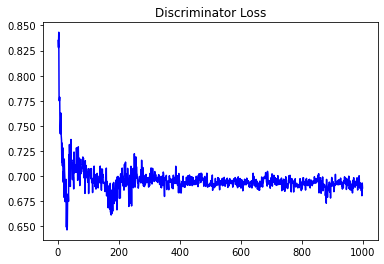

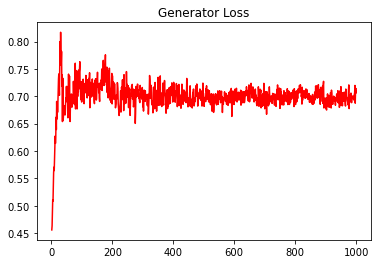

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.6333453979361803


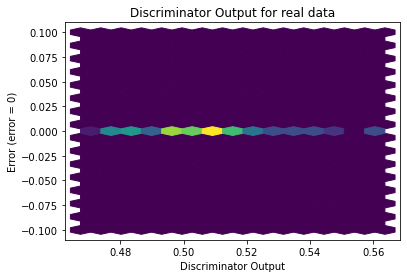

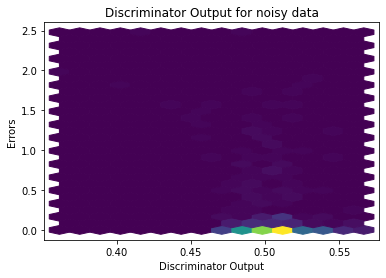

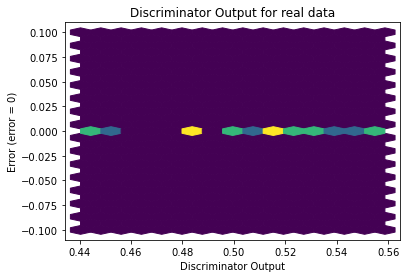

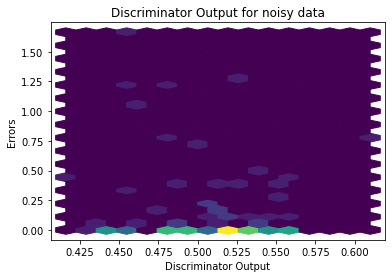

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

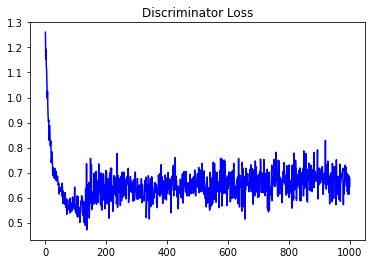

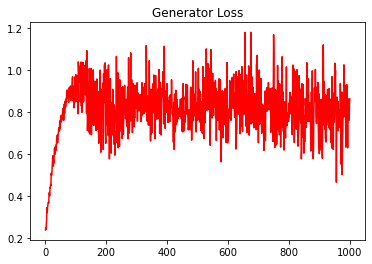

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.4648717603441328


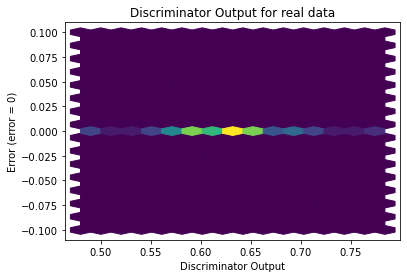

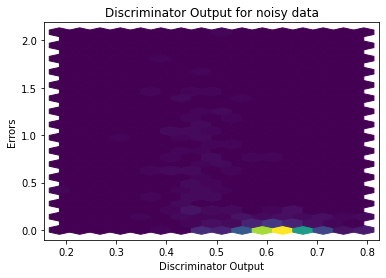

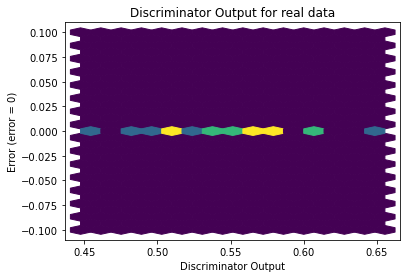

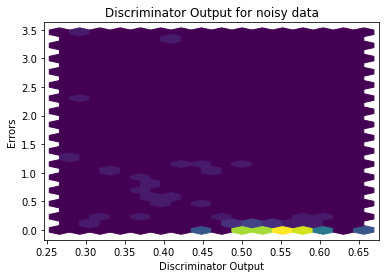

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


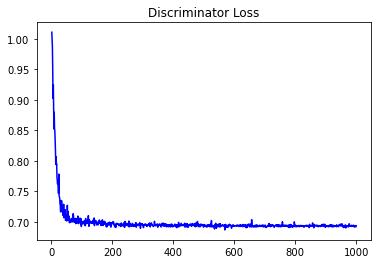

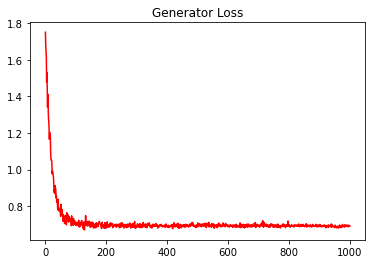

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.869155519043561


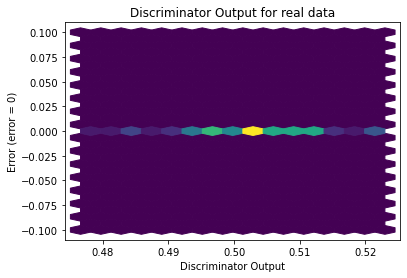

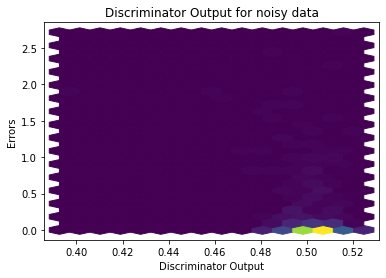

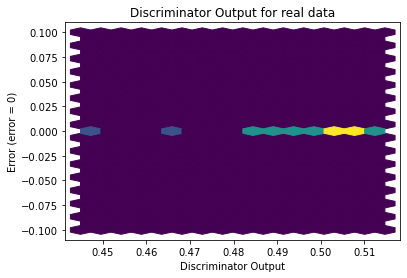

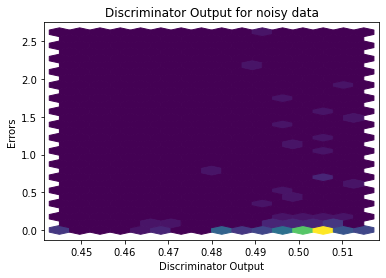

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


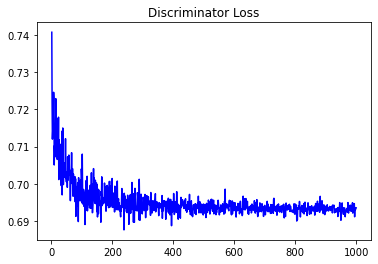

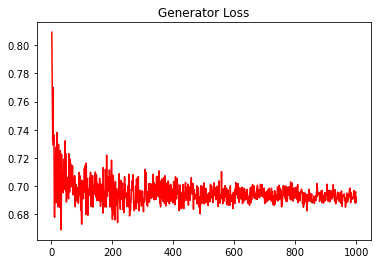

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
1.1755723042308819


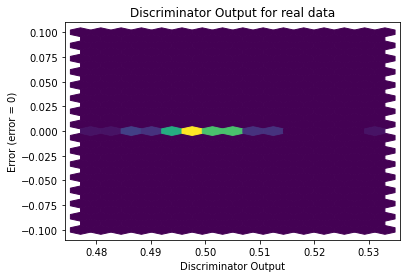

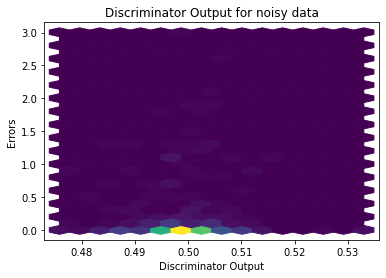

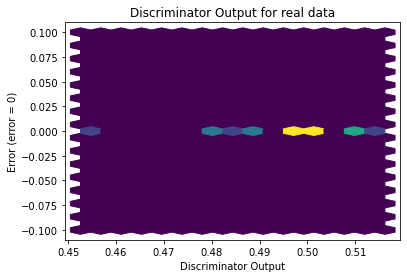

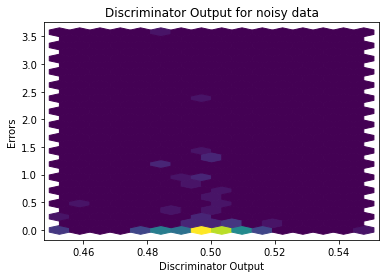

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2874]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0004]], requires_grad=True)
